#               Iris Dataset Analysis

This notebook performs exploratory analysis of the famous iris dataset. The dataset includes three iris species with 50 samples each with properties of each flower.

 The columns in the dataset are:
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)
- Target
- Species


## Import Modules

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris




## Loading the Dataset

In [38]:
iris = load_iris()

#Creating Dataframe with features
irisDF= pd.DataFrame(data=iris.data, columns=iris.feature_names)

#Adding target column to the DataFrame
irisDF['target'] = iris.target

#Adding species name by mapping target to target_names
irisDF['species'] = irisDF['target'].map(dict(enumerate(iris.target_names)))

irisDF.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


## Basic Statistics and Info About The Data

In [31]:
# Displaying basic statistics of the iris dataset
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Displaying basic info of the iris dataset
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
#checking for null values
irisDF.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

## Exploratory Analysis

<Figure size 1000x600 with 0 Axes>

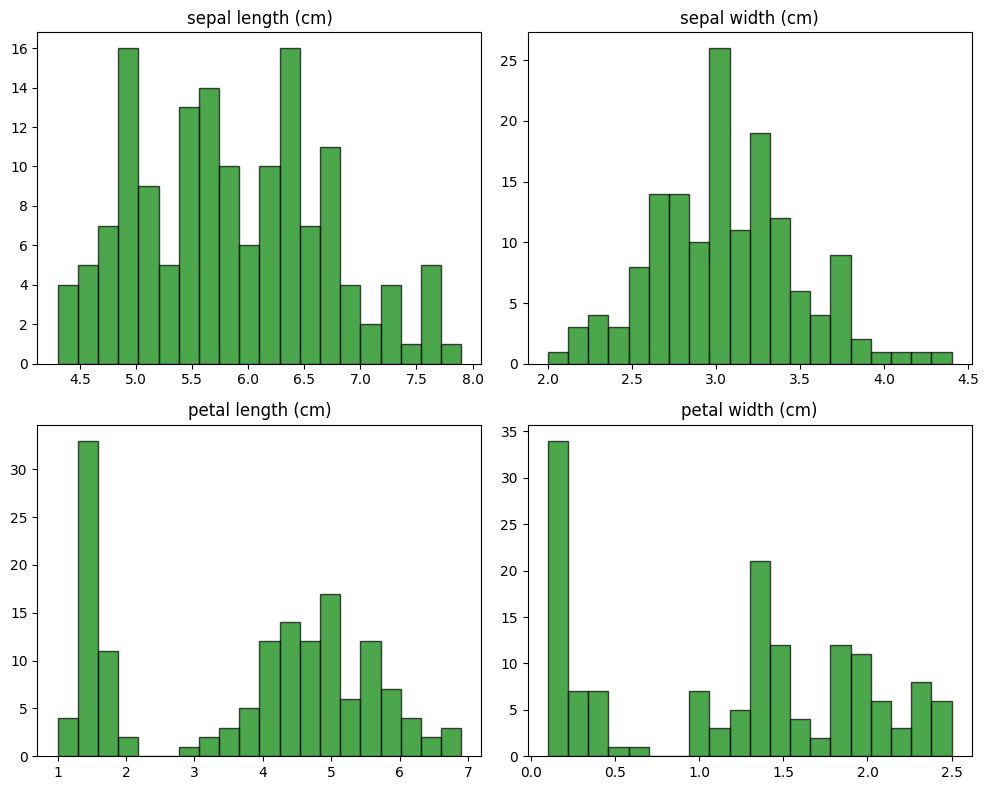

In [33]:
#Creating histograms for each feature
columnsToPlot = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
plt.figure(figsize=(10,6)) # Flatten the 2D array into 1D for looping

fig, axes = plt.subplots(2,2,figsize=(10, 8))
axes = axes.ravel()

for i, col in enumerate(columnsToPlot):
    axes[i].hist(irisDF[col], bins=20, color='green', edgecolor = 'black',alpha=0.7)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

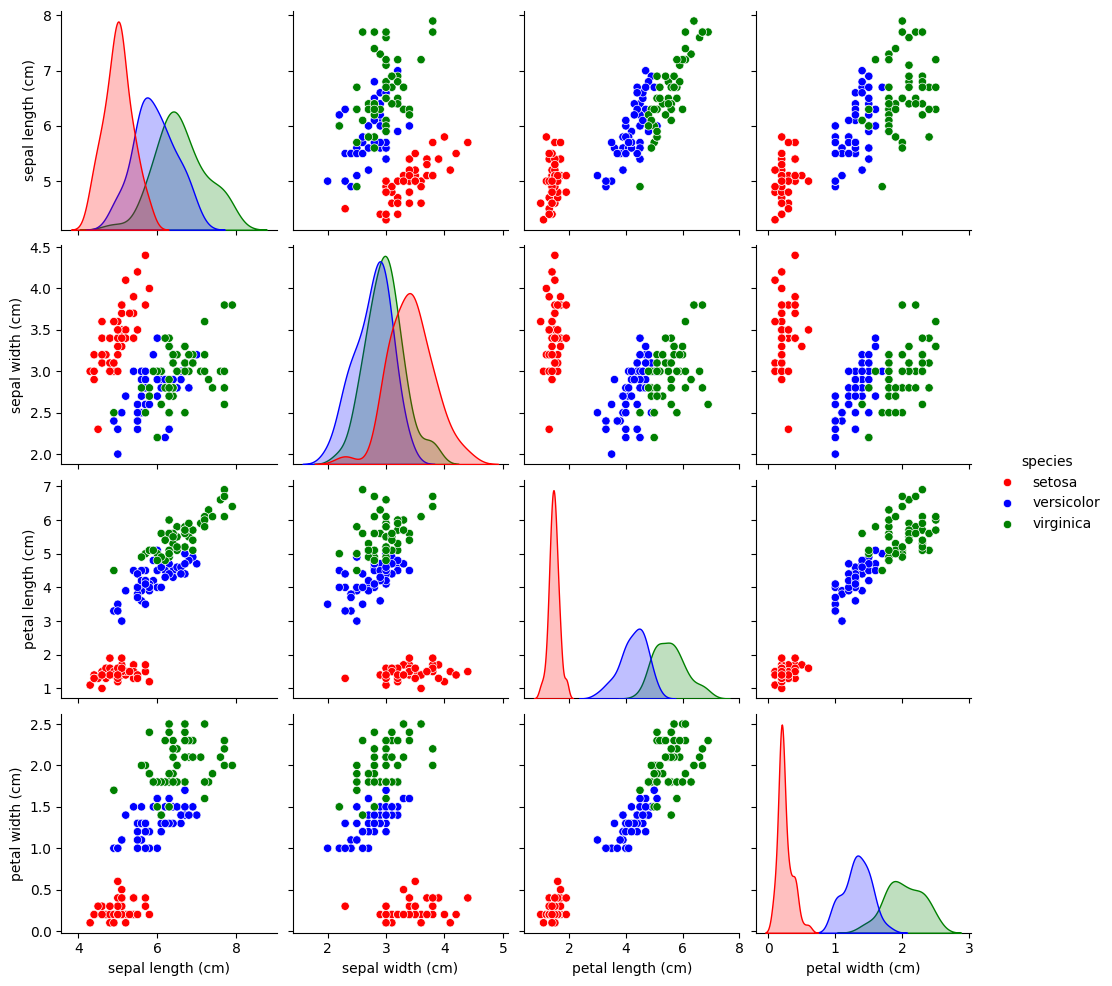

In [34]:
#Creating pair plots and density plots for each pair of features
plotDF = irisDF.drop(columns=['target'])
colorMap = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
plt.figure(figsize=(10, 6))
sns.pairplot(plotDF, hue='species', palette=colorMap, diag_kind='kde')
plt.show()


We can see 3 distinct groups in the pair plot based on the different features.

## Correlation Matrix

In [35]:
irisDfForCorrelation=irisDF.drop(columns = ['target', 'species'])
irisDfForCorrelation.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


From the correlation matrix, we can see that **sepal length** has a high correlation with **petal length and width** and the relationships are positive. **Sepal width** has a negative relationship with **petal length and width**, but the correlation is moderate. The correlation between **petal length and width** are is extremely high with a positive relationship.

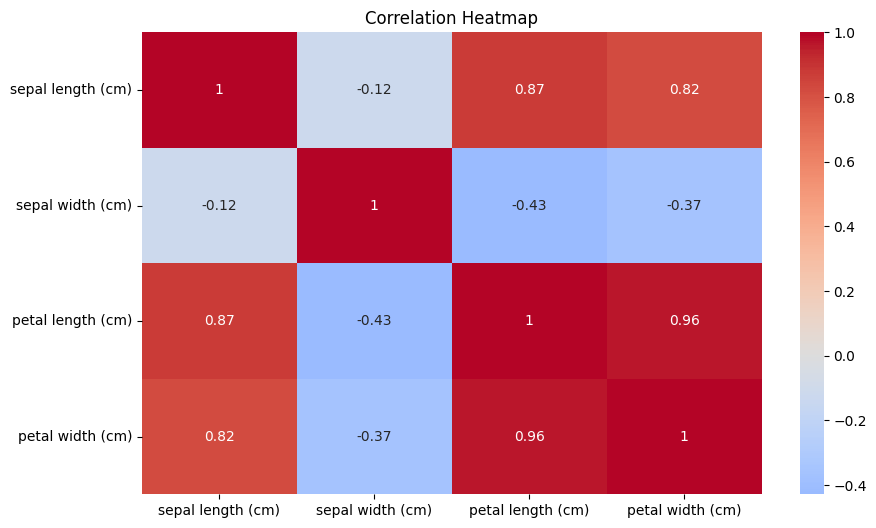

In [ ]:
#Correlation matrix heatmap
corr = irisDfForCorrelation.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()